In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


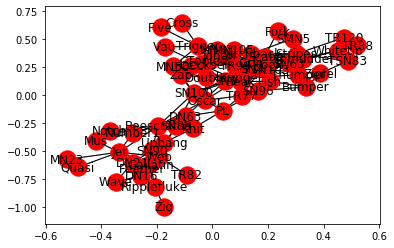

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [2]:
import networkx as nx
# 对网络G进行可视化
def plot_graph(G):
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos, edges=edges);
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=200, node_color='r', alpha=0.8)
    nx.draw_networkx_edges(G, pos, edgelist=edges,alpha =0.4)
    plt.show()
# 数据加载，构造图
G = nx.read_gml('dolphins.gml')
# 可视化
plot_graph(G)
print(list(G.nodes()))



In [3]:
# 构建GCN，计算A_hat和D_hat矩阵
#按照字母顺序排序
order = sorted(list(G.nodes())) 
print(order)
A = nx.to_numpy_matrix(G, nodelist=order)
# 邻接矩阵
print(A) 
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I
print(A_hat)


['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'Patchback', 'Quasi', 'Ripplefluke', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Thumper', 'Topless', 'Trigger', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]


In [4]:
# D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat, axis=0))[0]
print('D_hat=\n', D_hat)
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat=\n', D_hat)


D_hat=
 [ 7.  9.  5.  4.  2.  5.  7.  6.  7.  8.  6.  2.  2.  9. 13.  8.  7. 10.
  8.  5. 10.  7.  2.  4.  7.  4.  4.  6.  6.  6. 10.  2.  4.  2.  8. 12.
  9.  3.  9.  6.  7. 11.  6.  8.  3.  7.  2.  3.  8.  5.  3.  5. 12. 11.
  8.  3.  3. 10.  2.  6.  2.  4.]
D_hat=
 [[7. 0. 0. ... 0. 0. 0.]
 [0. 9. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 6. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 4.]]


In [5]:
# 初始化权重
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
print('W_1=\n', W_1)
print('W_2=\n', W_2)


W_1=
 [[ 0.4842475  -1.46360828 -1.40838689  0.16191407]
 [-0.55975132  0.21450975  0.28703487 -0.06699612]
 [-1.92952972  1.31663775 -0.76876387 -0.22278516]
 [-0.47353378 -0.80757447 -1.17568693  1.2284799 ]
 [ 1.01226403  3.15104662 -2.09062718 -0.95207341]
 [-1.56304134 -1.01420988  0.27533981 -1.32933985]
 [-0.5188458   0.88637746  0.18940798 -2.10664124]
 [ 0.6336798  -0.914605   -0.81802596 -0.64195834]
 [ 1.01191943 -1.63364123 -1.13048154  0.51532565]
 [ 1.42678903 -0.69337643 -0.01665867 -0.51766786]
 [ 0.09546701  1.19779828 -0.1574604   0.5548813 ]
 [ 2.25076536  0.68626086 -0.59877114  0.88634206]
 [ 2.80994694  0.57832721 -0.94418397  0.68703549]
 [-2.08509089  0.94333358 -0.10563131  1.39123894]
 [ 0.58523563 -1.30524687  0.37961288 -0.06391877]
 [-1.88681467  0.03598664 -0.73844591 -1.07786439]
 [ 0.50810886 -0.00548317 -0.75125502 -1.19128972]
 [ 0.25992422 -0.15429192  0.51652072 -1.58097899]
 [-0.69351716 -1.62220537 -1.25609563  1.91054789]
 [ 0.97014806  0.40448151

In [6]:
# 叠加GCN层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一个 one-hot 编码的类别变量
def gcn_layer(A_hat, D_hat, X, W):
	return D_hat**-1 * A_hat * X * W
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print('output=\n', output)
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations=\n', feature_representations)


output=
 [[ 0.68440742 -0.76923401]
 [ 0.16021267 -0.51750228]
 [ 0.50845277  0.26001215]
 [ 0.66141286 -1.02596218]
 [-1.02691384  1.65925032]
 [-0.88174995 -0.32051496]
 [-0.72607131 -0.14161199]
 [ 0.18482598 -0.6663077 ]
 [ 0.67399863 -0.94252035]
 [-0.13869117 -0.27547685]
 [ 0.81596352 -0.78304925]
 [ 0.38400405  1.08611038]
 [ 1.14392427  2.63086618]
 [-0.13314981 -0.24478542]
 [ 0.12874428  0.14723057]
 [ 0.02381751 -0.91506931]
 [ 0.00700585  0.52995829]
 [-0.70458765 -0.11760517]
 [ 0.32031016 -0.34444812]
 [ 0.11776882 -0.48078762]
 [ 0.26676756 -0.34585942]
 [ 0.16190002  0.21186369]
 [-0.40352636  0.17423738]
 [-0.2816924   0.59479317]
 [ 0.23123566 -0.19021734]
 [-0.10151169 -0.63375355]
 [-0.35161001 -0.61793934]
 [-0.19398653 -0.43967723]
 [ 0.69601882 -1.32652102]
 [ 0.98387951 -1.16761354]
 [ 0.3636898  -0.05650905]
 [-0.94632115  0.02448681]
 [-0.7038804  -0.17040496]
 [ 0.72095569 -0.45503245]
 [-0.33214946 -0.18546857]
 [ 0.23488812  0.26484535]
 [-0.47696125  0.96

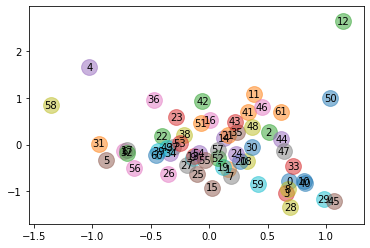

In [8]:
# # 不同节点value，绘制不同的颜色
# def getValue(value):
#     colorList = ['blue','green','purple','yellow','red','pink','orange','black','white','gray','brown','wheat']
#     return colorList[int(value)]
# 绘制output，节点GCN embedding可视化
def plot_node(output):
    for i in range(len(nodes)):
        node_name = nodes[i]
#         value = G.nodes[node_name]['value']
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i),alpha=0.5,s = 250)
        plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
    plt.show()
plot_node(output)


### 使用Relu的话，第二个坐标轴的数值全部都为0，效果不好，所以去掉。